# Homework #4

### Regression

#### 1.

In [149]:
import numpy as np
import pandas
import random

noisysine_csv = "noisysine.csv"
hydrodynamics_csv = "hydrodynamics.csv"
tsp_csv = "tsp.csv"

y_label = "y"

seed = 32
np.random.seed(seed)
random.seed(seed)

def get_dataset(filename):
    dataset = pandas.read_csv(filename)
    x = dataset.drop(y_label, 1)
    y = dataset[y_label]
    return np.array(x), np.array(y)

In [98]:
def R2score(h, x, y):    
    n = y.shape[0]
    y_mean = y.sum() / n
    v = ((y_mean - y) ** 2).sum()
    u = ((h(x) - y) ** 2).sum()
    
    return 1 - u / v

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

def regression(x, y, degree):
    def get_w(x, y):
        return np.linalg.inv(np.matrix.transpose(x) @ x) @ np.matrix.transpose(x) @ y

    def get_h(w, poly_features):
        def h(x):
            return poly_features.fit_transform(x) @ np.matrix.transpose(w)
        return h

    x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=seed)
    
    poly_features = PolynomialFeatures(degree=degree)
    poly_x_train = poly_features.fit_transform(x_train)
        
    w = get_w(poly_x_train, y_train)
    h = get_h(w, poly_features)
    
    return h, R2score(h, x_val, y_val) 

noisysine.csv dataset:

R2 score: -0.21306252356263844


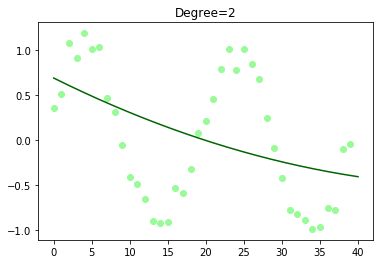

R2 score: 0.04812833250315718


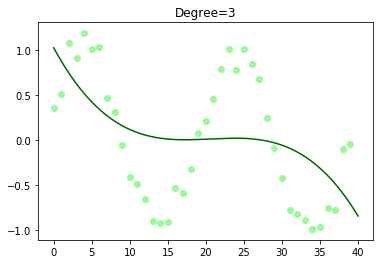

R2 score: 0.049644690831306515


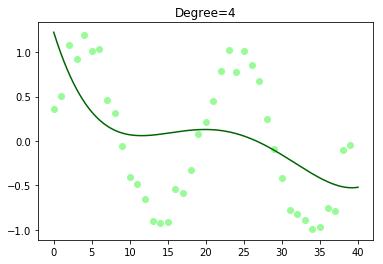

R2 score: 0.9132018725716731


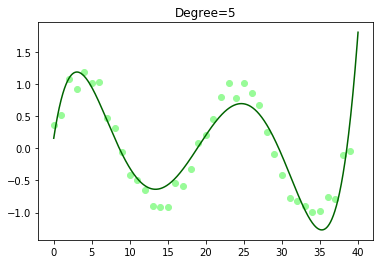

In [100]:
import matplotlib.pyplot as plt

x, y = get_dataset(noisysine_csv)

degrees = [i for i in range(2, 6)]

print("noisysine.csv dataset:\n")

for degree in degrees:
    h, score = regression(x, y, degree)

    print("R2 score: " + str(score))

    xfit = np.linspace(0, 40, 1000)
    yfit = h(xfit[:, np.newaxis])

    plt.scatter(x, y, color="palegreen")
    plt.plot(xfit, yfit, color="darkgreen")
    plt.title("Degree=" + str(degree))

    plt.show()

In [104]:
x, y = get_dataset(hydrodynamics_csv)

print("hydrodynamics.csv dataset:\n")
degree = 2

h, score = regression(x, y, degree)

print("For degree=" + str(degree) + " R2 score: " + str(score))

hydrodynamics.csv dataset:

For degree=2 R2 score: 0.8913888142823687


#### 2.

In [111]:
def ridge_regression(x, y, degree, alpha):
    def get_w(x, y, alpha):
        m = x.shape[1]
        return np.linalg.inv(np.matrix.transpose(x) @ x + alpha * np.eye(m)) @ np.matrix.transpose(x) @ y

    def get_h(w, poly_features):
        def h(x):
            return poly_features.fit_transform(x) @ np.matrix.transpose(w)
        return h

    x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=seed)
    
    poly_features = PolynomialFeatures(degree=degree)
    poly_x_train = poly_features.fit_transform(x_train)
        
    w = get_w(poly_x_train, y_train, alpha)
    h = get_h(w, poly_features)
    
    return h, R2score(h, x_val, y_val) 

In [133]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:4000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

noisysine.csv dataset:

For alpha=1e-15 R2 score: -0.21306252356263844
For alpha=1e-14 R2 score: -0.21306252356263666
For alpha=1e-13 R2 score: -0.21306252356263577
For alpha=1e-12 R2 score: -0.2130625235626149
For alpha=1e-11 R2 score: -0.21306252356240485
For alpha=1e-10 R2 score: -0.21306252356029454
For alpha=1e-09 R2 score: -0.21306252353920518
For alpha=1e-08 R2 score: -0.21306252332831477
For alpha=1e-07 R2 score: -0.21306252121940084
For alpha=1e-06 R2 score: -0.21306250013027128
For alpha=1e-05 R2 score: -0.21306228923949133
For alpha=0.0001 R2 score: -0.21306018038272168
For alpha=0.001 R2 score: -0.21303909691705591
For alpha=0.01 R2 score: -0.21282877123808186
For alpha=0.1 R2 score: -0.21077521387843157
For alpha=1.0 R2 score: -0.19424188502910456
For alpha=10.0 R2 score: -0.14511048126552506
For alpha=100.0 R2 score: -0.11148513039767582
For alpha=1000.0 R2 score: -0.06427246245112461
For alpha=10000.0 R2 score: -0.04113835265482968

Min score for alpha=10000.0, score=-0.

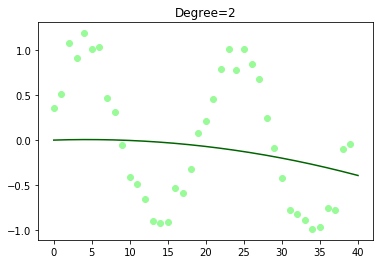

For alpha=1e-15 R2 score: 0.04812833250315718
For alpha=1e-14 R2 score: 0.048128332503188376
For alpha=1e-13 R2 score: 0.04812833250313908
For alpha=1e-12 R2 score: 0.048128332503097115
For alpha=1e-11 R2 score: 0.048128332502409
For alpha=1e-10 R2 score: 0.04812833249572168
For alpha=1e-09 R2 score: 0.048128332428687526
For alpha=1e-08 R2 score: 0.048128331758419574
For alpha=1e-07 R2 score: 0.04812832505597775
For alpha=1e-06 R2 score: 0.04812825803132381
For alpha=1e-05 R2 score: 0.0481275877867513
For alpha=0.0001 R2 score: 0.04812088554224758
For alpha=0.001 R2 score: 0.04805388317149062
For alpha=0.01 R2 score: 0.047385861290758835
For alpha=0.1 R2 score: 0.040900278811755286
For alpha=1.0 R2 score: -0.008855545946877319
For alpha=10.0 R2 score: -0.12732850580148436
For alpha=100.0 R2 score: -0.11720476858860285
For alpha=1000.0 R2 score: -0.027728780540048792
For alpha=10000.0 R2 score: -0.0026141829179477938

Min score for alpha=1e-14, score=0.048128332503188376


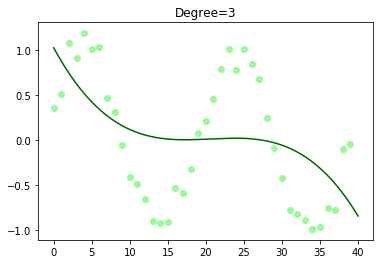

For alpha=1e-15 R2 score: 0.049644690831306515
For alpha=1e-14 R2 score: 0.049644690831583405
For alpha=1e-13 R2 score: 0.049644690831213145
For alpha=1e-12 R2 score: 0.04964469083042822
For alpha=1e-11 R2 score: 0.0496446908292586
For alpha=1e-10 R2 score: 0.04964469082092149
For alpha=1e-09 R2 score: 0.049644690735005215
For alpha=1e-08 R2 score: 0.04964468987253934
For alpha=1e-07 R2 score: 0.04964468123429233
For alpha=1e-06 R2 score: 0.04964459485628825
For alpha=1e-05 R2 score: 0.04964373108920428
For alpha=0.0001 R2 score: 0.049635093828250265
For alpha=0.001 R2 score: 0.049548762944802816
For alpha=0.01 R2 score: 0.04868960608235684
For alpha=0.1 R2 score: 0.04049431946602966
For alpha=1.0 R2 score: -0.014660830107920075
For alpha=10.0 R2 score: -0.10557431146859497
For alpha=100.0 R2 score: -0.10456546269173583
For alpha=1000.0 R2 score: -0.08913040747926426
For alpha=10000.0 R2 score: -0.05841747496032723

Min score for alpha=1e-14, score=0.049644690831583405


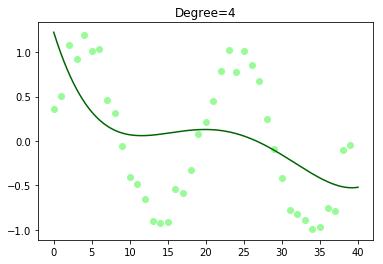

For alpha=1e-15 R2 score: 0.9132018725716731
For alpha=1e-14 R2 score: 0.9132018725720911
For alpha=1e-13 R2 score: 0.9132018725761281
For alpha=1e-12 R2 score: 0.9132018725730582
For alpha=1e-11 R2 score: 0.9132018725852762
For alpha=1e-10 R2 score: 0.913201872569303
For alpha=1e-09 R2 score: 0.9132018725522584
For alpha=1e-08 R2 score: 0.9132018724239729
For alpha=1e-07 R2 score: 0.9132018710953351
For alpha=1e-06 R2 score: 0.9132018577162963
For alpha=1e-05 R2 score: 0.9132017241188478
For alpha=0.0001 R2 score: 0.9132003880630393
For alpha=0.001 R2 score: 0.9131870277892167
For alpha=0.01 R2 score: 0.9130534658068787
For alpha=0.1 R2 score: 0.9117215888613972
For alpha=1.0 R2 score: 0.8985392205395859
For alpha=10.0 R2 score: 0.7706349391510986
For alpha=100.0 R2 score: 0.4038142970663603
For alpha=1000.0 R2 score: 0.2279697072953274
For alpha=10000.0 R2 score: 0.03832020297317029

Min score for alpha=1e-11, score=0.9132018725852762


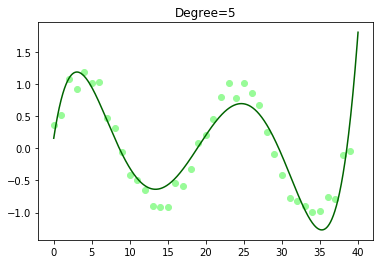

In [134]:
import matplotlib.pyplot as plt

x, y = get_dataset(noisysine_csv)

degrees = [i for i in range(2, 6)]
alphas = [10.0 ** i for i in range(-15, 5)]

print("noisysine.csv dataset:\n")

for degree in degrees:
    ans_alpha = 0
    ans_score = -np.inf
    
    for alpha in alphas:
        h, score = ridge_regression(x, y, degree, alpha)
        
        if score > ans_score:
            ans_alpha = alpha
            ans_score = score

        print("For alpha=" + str(alpha) + " R2 score: " + str(score))

    print("\nMin score for alpha=" + str(ans_alpha) + ", score=" + str(ans_score))
    
    h, score = ridge_regression(x, y, degree, ans_alpha)
    
    xfit = np.linspace(0, 40, 1000)
    yfit = h(xfit[:, np.newaxis])

    plt.scatter(x, y, color="palegreen")
    plt.plot(xfit, yfit, color="darkgreen")
    plt.title("Degree=" + str(degree))

    plt.show()

In [135]:
import matplotlib.pyplot as plt

x, y = get_dataset(hydrodynamics_csv)

degree = 2
alphas = [10.0 ** i for i in range(-15, 5)]

print("hydrodynamics.csv dataset:\n")

ans_alpha = 0
ans_score = -np.inf

for alpha in alphas:
    h, score = ridge_regression(x, y, degree, alpha)

    if score > ans_score:
        ans_alpha = alpha
        ans_score = score

    print("For alpha=" + str(alpha) + " R2 score: " + str(score))

print("\nMin score for alpha=" + str(ans_alpha) + ", score=" + str(ans_score))

hydrodynamics.csv dataset:

For alpha=1e-15 R2 score: 0.8913887823931145
For alpha=1e-14 R2 score: 0.8913887737088432
For alpha=1e-13 R2 score: 0.8913885972846001
For alpha=1e-12 R2 score: 0.8913887314339709
For alpha=1e-11 R2 score: 0.8913886207982482
For alpha=1e-10 R2 score: 0.8913889657213256
For alpha=1e-09 R2 score: 0.8913915288820029
For alpha=1e-08 R2 score: 0.8914067363748284
For alpha=1e-07 R2 score: 0.8915101118420514
For alpha=1e-06 R2 score: 0.8919095381238104
For alpha=1e-05 R2 score: 0.8929831659263213
For alpha=0.0001 R2 score: 0.8958295814442264
For alpha=0.001 R2 score: 0.9080043651481354
For alpha=0.01 R2 score: 0.8932697239932234
For alpha=0.1 R2 score: 0.7131454409085722
For alpha=1.0 R2 score: 0.6318402415351496
For alpha=10.0 R2 score: 0.6346734500247035
For alpha=100.0 R2 score: 0.5626827201974871
For alpha=1000.0 R2 score: 0.1208496293835668
For alpha=10000.0 R2 score: -0.027855092342067955

Min score for alpha=0.001, score=0.9080043651481354


#### 3.

In [146]:
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')

def lasso_regression(x, y, degree, alpha):
    def get_h(regression, poly_features):
        def h(x):
            return regression.predict(poly_features.fit_transform(x))
        return h

    x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=seed)
    
    poly_features = PolynomialFeatures(degree=degree)
    poly_x_train = poly_features.fit_transform(x_train)
    poly_x_val = poly_features.fit_transform(x_val)
        
    lasso = Lasso(alpha=alpha, max_iter=2000000)    
    lasso.fit(poly_x_train, y_train)
    
    h = get_h(lasso, poly_features)
    
    return h, lasso.score(poly_x_val, y_val), len(lasso.coef_[lasso.coef_ != 0])

noisysine.csv dataset:

For alpha=1e-15 R2 score: -0.213062523562638
For alpha=1e-14 R2 score: -0.213062523562638
For alpha=1e-13 R2 score: -0.213062523562636
For alpha=1e-12 R2 score: -0.213062523562618
For alpha=1e-11 R2 score: -0.21306252356243616
For alpha=1e-10 R2 score: -0.2130625235606185
For alpha=1e-09 R2 score: -0.2130625235424397
For alpha=1e-08 R2 score: -0.2130625233606389
For alpha=1e-07 R2 score: -0.21306252154247018
For alpha=1e-06 R2 score: -0.21306250335933474
For alpha=1e-05 R2 score: -0.21306232152597038
For alpha=0.0001 R2 score: -0.21306050652639597
For alpha=0.001 R2 score: -0.21304249239360007
For alpha=0.01 R2 score: -0.21287608801003532
For alpha=0.1 R2 score: -0.21257566397474004
For alpha=1.0 R2 score: -0.22667167000692287
For alpha=10.0 R2 score: -0.22174282588640581
For alpha=100.0 R2 score: -0.21922911689264304
For alpha=1000.0 R2 score: -0.2571107663878427
For alpha=10000.0 R2 score: -0.2571107663878427

Min score for alpha=0.1, score=-0.2125756639747400

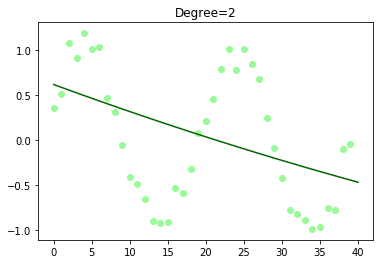

For alpha=1e-15 R2 score: 0.04812833250312487
For alpha=1e-14 R2 score: 0.04812833250310988
For alpha=1e-13 R2 score: 0.048128332503036386
For alpha=1e-12 R2 score: 0.04812833250203685
For alpha=1e-11 R2 score: 0.04812833249219384
For alpha=1e-10 R2 score: 0.04812833239369829
For alpha=1e-09 R2 score: 0.04812833140859252
For alpha=1e-08 R2 score: 0.04812832155755198
For alpha=1e-07 R2 score: 0.04812822304718867
For alpha=1e-06 R2 score: 0.048127237944401324
For alpha=1e-05 R2 score: 0.0481173868251733
For alpha=0.0001 R2 score: 0.0480188694068715
For alpha=0.001 R2 score: 0.04703304895824578
For alpha=0.01 R2 score: 0.037109662684903566
For alpha=0.1 R2 score: -0.06886806746219332
For alpha=1.0 R2 score: -0.24706969132514423
For alpha=10.0 R2 score: -0.20028931349568047
For alpha=100.0 R2 score: -0.19936252350353767
For alpha=1000.0 R2 score: -0.19353843445687868
For alpha=10000.0 R2 score: -0.2571107663878427

Min score for alpha=1e-15, score=0.04812833250312487
Number of used feature

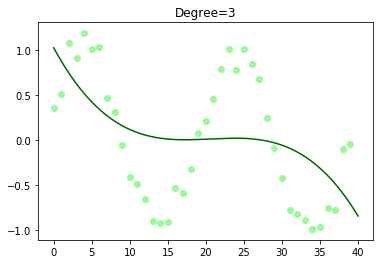

For alpha=1e-15 R2 score: 0.04964469083108325
For alpha=1e-14 R2 score: 0.049644690831160965
For alpha=1e-13 R2 score: 0.04964469083133305
For alpha=1e-12 R2 score: 0.04964469082996581
For alpha=1e-11 R2 score: 0.049644690820612514
For alpha=1e-10 R2 score: 0.04964469072401245
For alpha=1e-09 R2 score: 0.04964468975885583
For alpha=1e-08 R2 score: 0.04964468010738432
For alpha=1e-07 R2 score: 0.049644583592902136
For alpha=1e-06 R2 score: 0.049643618444627835
For alpha=1e-05 R2 score: 0.049633966841238886
For alpha=0.0001 R2 score: 0.0495374384921754
For alpha=0.001 R2 score: 0.048570923559156265
For alpha=0.01 R2 score: 0.03878257991927614
For alpha=0.1 R2 score: -0.06297135899267037
For alpha=1.0 R2 score: -0.14539104751316234
For alpha=10.0 R2 score: -0.2571777287278776
For alpha=100.0 R2 score: -0.21803517516427443
For alpha=1000.0 R2 score: -0.16884437978529965
For alpha=10000.0 R2 score: -0.16850816800241386

Min score for alpha=1e-13, score=0.04964469083133305
Number of used fea

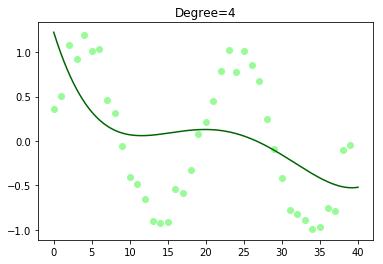

For alpha=1e-15 R2 score: 0.9127249415245161
For alpha=1e-14 R2 score: 0.9127249415215014
For alpha=1e-13 R2 score: 0.9127249415260116
For alpha=1e-12 R2 score: 0.9127249415221478
For alpha=1e-11 R2 score: 0.9127249415121746
For alpha=1e-10 R2 score: 0.9127249414406309
For alpha=1e-09 R2 score: 0.9127249406870526
For alpha=1e-08 R2 score: 0.9127249331752859
For alpha=1e-07 R2 score: 0.912724858040627
For alpha=1e-06 R2 score: 0.912724106623543
For alpha=1e-05 R2 score: 0.9127165914370264
For alpha=0.0001 R2 score: 0.9126413248304139
For alpha=0.001 R2 score: 0.9118771891782086
For alpha=0.01 R2 score: 0.9030891626112865
For alpha=0.1 R2 score: 0.7006761090539566
For alpha=1.0 R2 score: 0.511677349370323
For alpha=10.0 R2 score: -0.2745601980691099
For alpha=100.0 R2 score: -0.27300198030794953
For alpha=1000.0 R2 score: -0.25772427390317176
For alpha=10000.0 R2 score: -0.14725172014926136

Min score for alpha=1e-13, score=0.9127249415260116
Number of used features: 5


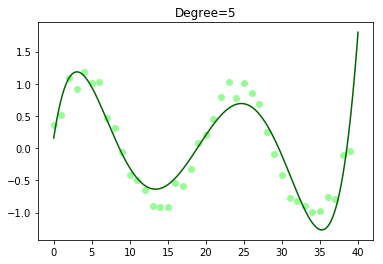

In [147]:
x, y = get_dataset(noisysine_csv)

degrees = [i for i in range(2, 6)]
alphas = [10.0 ** i for i in range(-15, 5)]

print("noisysine.csv dataset:\n")

for degree in degrees:
    ans_alpha = 0
    ans_score = -np.inf
    ans_num_used_features = None
    
    for alpha in alphas:
        h, score, num_used_features = lasso_regression(x, y, degree, alpha)
        
        if score > ans_score:
            ans_alpha = alpha
            ans_score = score
            ans_used_features = used_features

        print("For alpha=" + str(alpha) + " R2 score: " + str(score))

    print("\nMin score for alpha=" + str(ans_alpha) + ", score=" + str(ans_score))
    
    h, score, num_used_features = lasso_regression(x, y, degree, ans_alpha)
    
    print("Number of used features: " + str(num_used_features))
    
    xfit = np.linspace(0, 40, 1000)
    yfit = h(xfit[:, np.newaxis])

    plt.scatter(x, y, color="palegreen")
    plt.plot(xfit, yfit, color="darkgreen")
    plt.title("Degree=" + str(degree))

    plt.show()

In [148]:
x, y = get_dataset(hydrodynamics_csv)

degree = 2
alphas = [10.0 ** i for i in range(-15, 5)]

print("hydrodynamics.csv dataset:\n")

ans_alpha = 0
ans_score = -np.inf
ans_num_used_features = None

for alpha in alphas:
    h, score, num_used_features = lasso_regression(x, y, degree, alpha)

    if score > ans_score:
        ans_alpha = alpha
        ans_score = score
        ans_used_features = used_features

    print("For alpha=" + str(alpha) + " R2 score: " + str(score))

print("\nMin score for alpha=" + str(ans_alpha) + ", score=" + str(ans_score))

h, score, num_used_features = lasso_regression(x, y, degree, ans_alpha)

print("Number of used features: " + str(num_used_features))

hydrodynamics.csv dataset:

For alpha=1e-15 R2 score: 0.8921261722864147
For alpha=1e-14 R2 score: 0.8921261722890387
For alpha=1e-13 R2 score: 0.8921261723139733
For alpha=1e-12 R2 score: 0.8921261725623866
For alpha=1e-11 R2 score: 0.892126175048367
For alpha=1e-10 R2 score: 0.8921261999060437
For alpha=1e-09 R2 score: 0.8921264484558331
For alpha=1e-08 R2 score: 0.8921289310545023
For alpha=1e-07 R2 score: 0.8921533528083299
For alpha=1e-06 R2 score: 0.8923197136581948
For alpha=1e-05 R2 score: 0.8932271088044611
For alpha=0.0001 R2 score: 0.895166731532713
For alpha=0.001 R2 score: 0.9040639758254602
For alpha=0.01 R2 score: 0.8990331563559484
For alpha=0.1 R2 score: 0.6364863199757196
For alpha=1.0 R2 score: 0.6674302196806425
For alpha=10.0 R2 score: -0.11117610637866515
For alpha=100.0 R2 score: -0.11117610637866515
For alpha=1000.0 R2 score: -0.11117610637866515
For alpha=10000.0 R2 score: -0.11117610637866515

Min score for alpha=0.001, score=0.9040639758254602
Number of used 

### Global and Local Search

In [381]:
dataset = pandas.read_csv("tsp.csv", header=None)
x = np.array(dataset[1])
y = np.array(dataset[2])

In [350]:
def distance(x, y):
    n = len(x)
    summ = 0
    
    for i in range(1, n):
        summ += np.abs(x[i] - x[i - 1]) + np.abs(y[i] - y[i - 1])
    
    return summ

In [351]:
import time

plt.rcParams['figure.figsize'] = [8, 5]

def draw_path(x, y):
    n = len(x)
    
    for i in range(0, n - 1):
        plt.plot([x[i], x[i + 1]], [y[i], y[i]], color="yellowgreen", zorder=5)
        if np.abs(x[i + 1] - x[i]) > 70:
            plt.arrow(x[i], y[i], (x[i + 1] - x[i]) / 2, 0, color="yellowgreen", 
                      head_width=30, head_length=40)
        
        plt.plot([x[i + 1], x[i + 1]], [y[i], y[i + 1]], color="yellowgreen", zorder=5)
        if np.abs(y[i + 1] - y[i]) > 70:
            plt.arrow(x[i + 1], y[i], 0, (y[i + 1] - y[i]) / 2, color="yellowgreen", head_width=30, head_length=40)
    
    time.sleep(1)    
    
    plt.scatter(x, y, color="green", zorder=10)
    plt.scatter(x[0], y[0], color="red", zorder=10)
    plt.scatter(x[n - 1], y[n - 1], color="red", zorder=10)
    
    plt.show()

##### Monte-Carlo search

In [272]:
def monte_carlo_search(x, y, num_iters):
    ans_perm = None
    ans_dist = np.inf
    
    n = len(x)
    
    for _ in range(num_iters):
        perm = random.sample(range(0, n), n)
        cur_x = np.array([x[i] for i in perm]).copy()
        cur_y = np.array([y[i] for i in perm]).copy()
        
        dist = distance(cur_x, cur_y)
        
        if ans_dist > dist:
            ans_dist = dist
            ans_perm = perm.copy()

    ans_x = np.array([x[i] for i in ans_perm]).copy()
    ans_y = np.array([y[i] for i in ans_perm]).copy()      
    
    return ans_dist, ans_x, ans_y    

Distance = 29585


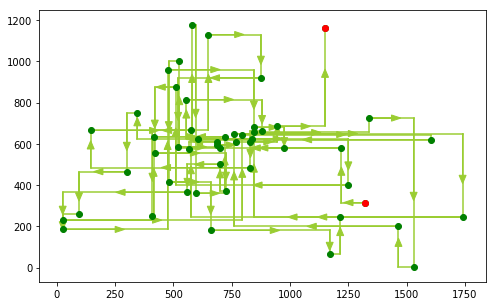

In [278]:
dist, ans_x, ans_y = monte_carlo_search(x, y, 3000)

print("Distance = " + str(dist))
draw_path(ans_x, ans_y)

##### Random walk search

In [287]:
def random_walk_search(x, y, num_iters):
    n = len(x)
    ans_perm = None
    ans_dist = np.inf
    
    perm = random.sample(range(0, n), n)    
    
    for _ in range(num_iters):
        cur_x = np.array([x[i] for i in perm]).copy()
        cur_y = np.array([y[i] for i in perm]).copy()
        
        dist = distance(cur_x, cur_y)
        
        if ans_dist > dist:
            ans_dist = dist
            ans_perm = perm.copy()
        
        pair = random.sample(range(0, n), 2)
        perm[pair[0]], perm[pair[1]] = perm[pair[1]], perm[pair[0]]

    ans_x = np.array([x[i] for i in ans_perm]).copy()
    ans_y = np.array([y[i] for i in ans_perm]).copy()      
    
    return ans_dist, ans_x, ans_y    

Distance = 29635


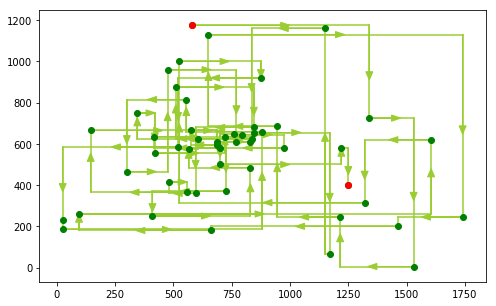

In [289]:
dist, ans_x, ans_y = random_walk_search(x, y, 3000)

print("Distance = " + str(dist))
draw_path(ans_x, ans_y)

##### Hill climb algorithm

In [307]:
def hill_climb(x, y, num_iters):
    n = len(x)
    
    perm = random.sample(range(0, n), n)   
    
    cur_x = np.array([x[i] for i in perm]).copy()
    cur_y = np.array([y[i] for i in perm]).copy()
        
    dist = distance(cur_x, cur_y)
    
    for _ in range(num_iters):
        best_dist = dist
        best_perm = perm.copy()
        
        for i in range(0, n):
            for j in range(i + 1, n):
                cur_perm = perm.copy()
                cur_perm[i], cur_perm[j] = cur_perm[j], cur_perm[i]
                
                cur_x = np.array([x[i] for i in cur_perm]).copy()
                cur_y = np.array([y[i] for i in cur_perm]).copy()
                                
                cur_dist = distance(cur_x, cur_y)
                
                if cur_dist < best_dist:
                    best_dist = distance(cur_x, cur_y)
                    best_perm = cur_perm.copy()
                
        if best_dist == dist:
            break
        
        dist = best_dist
        perm = best_perm.copy()
    
    ans_x = np.array([x[i] for i in perm]).copy()
    ans_y = np.array([y[i] for i in perm]).copy()  
    
    return dist, ans_x, ans_y   

Distance = 14010


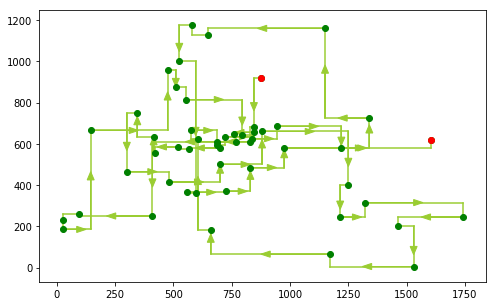

In [310]:
dist, ans_x, ans_y = hill_climb(x, y, 30)

print("Distance = " + str(dist))
draw_path(ans_x, ans_y)

##### Simulated annealing algorithm

In [342]:
import scipy

def softmax_func(x):
    return np.exp(x) / np.sum(np.exp(x))

def simulated_annealing(x, y, num_iters, ts):
    n = len(x)
    num_t = len(ts)
    
    perm = random.sample(range(0, n), n)   
    
    cur_x = np.array([x[i] for i in perm]).copy()
    cur_y = np.array([y[i] for i in perm]).copy()
        
    dist = distance(cur_x, cur_y)
    
    for itr in range(num_iters):
        cur_perms = []
        cur_deltas = []
        
        for i in range(0, n):
            for j in range(i + 1, n):
                cur_perm = perm.copy()
                cur_perm[i], cur_perm[j] = cur_perm[j], cur_perm[i]
                
                cur_perms.append(cur_perm.copy())
                
                cur_x = np.array([x[i] for i in cur_perm]).copy()
                cur_y = np.array([y[i] for i in cur_perm]).copy()
                                
                cur_dist = distance(cur_x, cur_y)
                cur_deltas.append(dist - cur_dist)
                
        cur_temp = ts[itr % num_t]
        probs = scipy.special.softmax(np.array(cur_deltas) / cur_temp)
    
        ind = np.random.choice(len(cur_perms), p=probs)
        perm = (cur_perms[ind]).copy()
        dist = dist - cur_deltas[ind]
    
    ans_x = np.array([x[i] for i in perm]).copy()
    ans_y = np.array([y[i] for i in perm]).copy()  
    
    return dist, ans_x, ans_y   

Distance = 11170


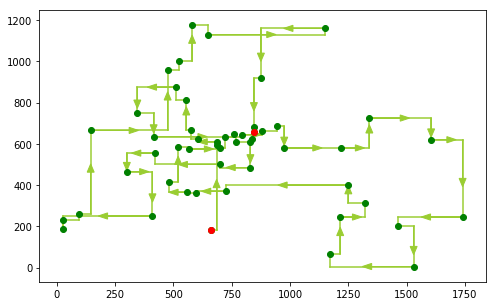

In [349]:
ts = [1000, 100, 10, 0.1, 0.01, 0.001, 0.0001, 0.001, 0.01, 0.1, 10, 100]

dist, ans_x, ans_y = simulated_annealing(x, y, 150, ts)

print("Distance = " + str(dist))
draw_path(ans_x, ans_y)

##### Genetic algorithm

In [483]:
def genetic_algorithm(x, y, num_iters, popul_size):
    def crossing_over(perm1, perm2):
        n = len(perm1)

        break_point1 = random.randint(0, n) # break before this index
        break_point2 = random.randint(break_point1, n) # break after this index

        new_perm1, new_perm2 = perm2.copy(), perm1.copy()

        inds_where_insert1 = [i for i in range(0, break_point1)] + [i for i in range(break_point2 + 1, n)]    
        cur_ind = 0
        for i in inds_where_insert1:                
            while perm1[cur_ind] in new_perm1[break_point1:break_point2 + 1]:
                cur_ind += 1
                if cur_ind == n:
                    cur_ind = 0
            new_perm1[i] = perm1[cur_ind]
            cur_ind += 1
            if cur_ind == n:
                cur_ind = 0

        inds_where_insert2 = [i for i in range(0, break_point1)] + [i for i in range(break_point2 + 1, n)]    
        cur_ind = 0
        for i in inds_where_insert2:        
            while perm2[cur_ind] in new_perm2[break_point1:break_point2 + 1]:
                cur_ind += 1
                if cur_ind == n:
                    cur_ind = 0
            new_perm2[i] = perm2[cur_ind]
            cur_ind += 1
            if cur_ind == n:
                cur_ind = 0

        return new_perm1, new_perm2
        
    def mutation(perm, prob=0.5):
        n = len(perm)
        perm = perm.copy()
        
        if np.random.uniform(0, 1) < prob:
            pair = random.sample(range(0, n), 2)
            perm[pair[0]], perm[pair[1]] = perm[pair[1]], perm[pair[0]]
        
        return perm
        
    n = len(x)
    perms = [random.sample(range(0, n), n) for _ in range(popul_size)]
    
    ans_perm = None
    ans_dist = np.inf
        
    for _ in range(num_iters):
        dists = [distance(([x[i] for i in perm]).copy(), ([y[i] for i in perm]).copy()) for perm in perms]        
        sorted_inds = np.argsort(dists)
        
        cur_perm = perms[sorted_inds[0]]
        cur_dist = min(dists)
        
        if cur_dist < ans_dist:
            ans_perm = cur_perm
            ans_dist = cur_dist
        
        perm1, perm2 = perms[sorted_inds[0]], perms[sorted_inds[1]]
        new_perm1, new_perm2 = crossing_over(perm1, perm2)
        new_perm1 = mutation(new_perm1)
        new_perm2 = mutation(new_perm2) 
        perms[sorted_inds[-1]], perms[sorted_inds[-2]] = new_perm1, new_perm2
    
    ans_x = np.array([x[i] for i in ans_perm]).copy()
    ans_y = np.array([y[i] for i in ans_perm]).copy()
    
    print(ans_perm)
    
    return ans_dist, ans_x, ans_y

[16, 20, 30, 17, 2, 31, 21, 22, 15, 26, 25, 12, 13, 46, 27, 45, 42, 9, 8, 18, 40, 7, 44, 48, 36, 24, 11, 32, 5, 14, 4, 39, 37, 47, 23, 3, 50, 51, 10, 38, 0, 49, 19, 43, 33, 35, 34, 28, 29, 6, 1, 41]
Distance = 14115


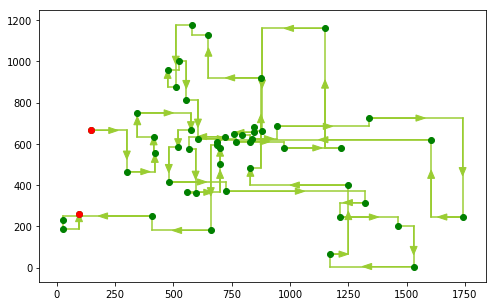

In [475]:
dist, ans_x, ans_y = genetic_algorithm(x, y, 2000, 250)

print("Distance = " + str(dist))
draw_path(ans_x, ans_y)